In [1]:
%pylab inline
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.datasets import make_blobs, load_digits
from sklearn.decomposition import PCA, TruncatedSVD

Populating the interactive namespace from numpy and matplotlib


In [2]:
figsize(10, 10)
plt.style.use(['dark_background'])

## reduzindo dimensões

In [3]:
def plot_scatter3d(data, target, name):
    fig = figure()
    ax = fig.gca(projection="3d")
    ax.scatter(data[:,0], data[:,1], data[:,2], c=target, s=150, cmap=cm.viridis)
    ax.w_xaxis.pane.fill = False
    ax.w_yaxis.pane.fill = False
    ax.w_zaxis.pane.fill = False
    ax.grid(False)
    savefig("../images/"+name+".png", dpi="figure", transparent=True)
    return ax

In [4]:
rand_state = np.random.randint(0, 100) # 70  2 87
d1 = make_blobs(n_samples=100, n_features=3, centers=3, random_state=87)
print(rand_state)

71


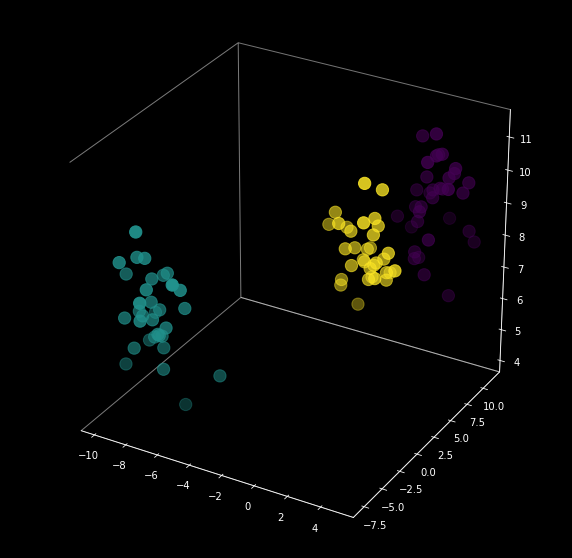

In [5]:
plot_scatter3d(d1[0], d1[1], "svd_pca_0_3d")

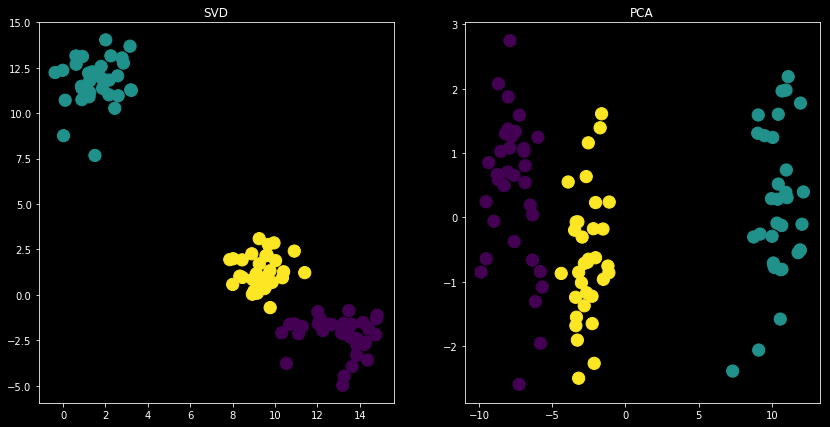

In [6]:
fig, ax = subplots(1, 2, figsize=(14, 7))

svd = TruncatedSVD(n_components=2)
X_svd_1 = svd.fit_transform(d1[0])
ax[0].scatter(X_svd_1[:, 0], X_svd_1[:, 1], c = d1[1], s=150)
ax[0].set_title("SVD")

pca = PCA(n_components=2)
X_pca_1 = pca.fit_transform(d1[0])
ax[1].scatter(X_pca_1[:, 0], X_pca_1[:, 1], c=d1[1], s=150)
ax[1].set_title("PCA");

savefig("../images/svd_pca_1_3dreduction.png", dpi="figure", transparent=True)

## transformação de matrizes

In [7]:
d2 = load_digits()

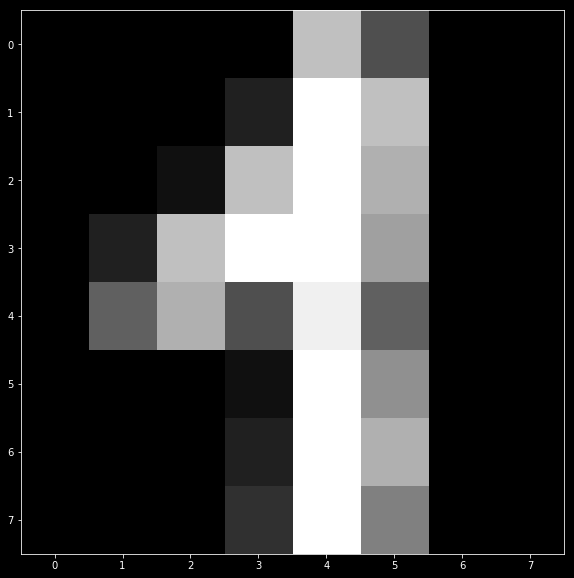

In [8]:
imshow(d2.images[42], cmap=cm.gray)

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

In [10]:
def make_area(kmeans, reduced_data, h=0.2):
    """based on https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html"""
    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    return Z.reshape(xx.shape), xx.min(), xx.max(), yy.min(), yy.max()

In [41]:
def plot_targets(km, ax, color):
    centroids = km.cluster_centers_
    for i in centroids:
        ax.annotate(
            str("X"),
            i, color=color, fontsize=15
        )

In [12]:
n_digits = 10 # 0 - 9

In [35]:
d2_svd = TruncatedSVD(n_components=2)
X_d2_svd = d2_svd.fit_transform(scale(d2.data))
km_svd = KMeans(n_clusters=n_digits, random_state=17)
km_svd.fit(X_d2_svd)
Z_svd, x_svd_min, x_svd_max, y_svd_min, y_svd_max = make_area(km_svd, X_d2_svd)

d2_pca = PCA(n_components=2)
X_d2_pca = d2_pca.fit_transform(scale(d2.data))
km_pca = KMeans(n_clusters=n_digits, random_state=17)
km_pca.fit(X_d2_pca)
Z_pca, x_pca_min, x_pca_max, y_pca_min, y_pca_max = make_area(km_pca, X_d2_pca)

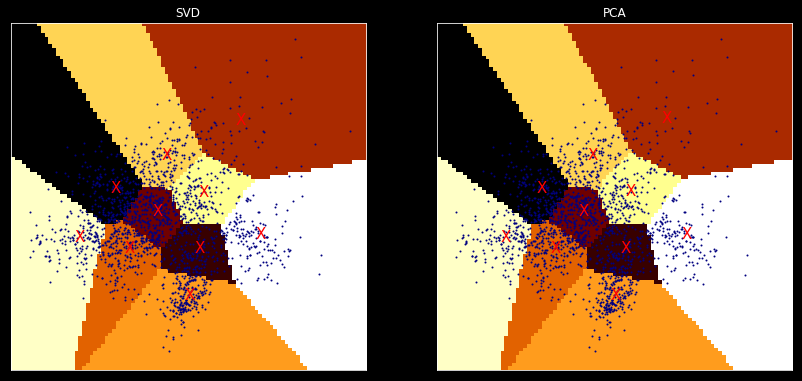

In [46]:
fig, (ax0, ax1) = subplots(1, 2, figsize=(14, 7))

ax0.imshow(Z_svd, cmap=cm.afmhot, interpolation="nearest", origin="lower",
          extent=(x_pca_min, x_pca_max, y_pca_min, y_pca_max))
ax0.set_xticks([]), ax0.set_yticks([])
plot_targets(km_svd, ax0, "red")
ax0.scatter(X_d2_svd[:, 0], X_d2_svd[:, 1], c="navy", alpha=1, s=1)
ax0.set_title("SVD", color="w")

ax1.imshow(Z_pca, cmap=cm.afmhot,  interpolation="nearest", origin="lower",
          extent=(x_pca_min, x_pca_max, y_pca_min, y_pca_max))
ax1.set_xticks([]), ax1.set_yticks([])
plot_targets(km_pca, ax1, "red")
ax1.scatter(X_d2_pca[:, 0], X_d2_pca[:, 1], c="navy", alpha=1, s=1)
ax1.set_title("PCA", color="w");

savefig("../images/svd_pca_2_64reduction.png", dpi="figure", transparent=True)

In [15]:
count_svd, count_pca = 0, 0
amostras = len(d2.target)
res_svd = km_svd.predict(X_d2_svd)
res_pca = km_pca.predict(X_d2_pca)

for _svd, _pca, target in zip(res_svd, res_pca, d2.target):
    if _svd != target:
        count_svd += 1
    if _pca != target:
        count_pca += 1

print(f"""
erros SVD: {count_svd} de {amostras}
erros PCA: {count_pca} de {amostras}
-----------------------
percentuais de acertos:
> SVD: {(amostras-count_svd)/amostras*100:.3f}%
> pca: {(amostras-count_pca)/amostras*100:.3f}%
""")


erros SVD: 1702 de 1797
erros PCA: 1680 de 1797
-----------------------
percentuais de acertos:
> SVD: 5.287%
> pca: 6.511%



In [25]:
km = KMeans(n_clusters=n_digits)
km.fit(d2.data)

count = 0
for res, target in zip(km.predict(d2.data), d2.target):
    if res != target:
        count+= 1

print(f"""
erros : {count} de {amostras}
-----------------------
percentuais de acertos:
> {(amostras-count)/amostras*100:.3f}%
""")


erros : 1465 de 1797
-----------------------
percentuais de acertos:
> 18.475%



In [17]:
from sklearn.svm import SVC

svc_svd, svc_pca, svc = SVC(), SVC(), SVC()
svc_svd.fit(X_d2_svd, d2.target)
svc_pca.fit(X_d2_pca, d2.target)
svc.fit(d2.data, d2.target)

svc_svd_pred = svc_svd.predict(X_d2_svd)
svc_pca_pred = svc_pca.predict(X_d2_pca)
svc_pred = svc.predict(d2.data)

ind_svd, ind_pca = [], []
count_svd = count_pca = count = 0
c =0
for _svd, _pca, _normal, _target in zip(svc_svd_pred, svc_pca_pred, svc_pred, d2.target):
    if _svd != _target:
        count_svd += 1
        ind_svd.append(c)
    if _pca != _target:
        count_pca += 1
        ind_pca.append(c)
    if _normal != _target:
        count += 1
    c+= 1

print(f"""
erros SVD: {count_svd} de {amostras}
erros PCA: {count_pca} de {amostras}
erros normal: {count} de {amostras}
-----------------------
percentuais de acertos:
> SVD: {(amostras-count_svd)/amostras*100:.3f}%
> pca: {(amostras-count_pca)/amostras*100:.3f}%
> normal: {(amostras-count)/amostras*100:.3f}%
""")

/usr/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



erros SVD: 704 de 1797
erros PCA: 704 de 1797
erros normal: 0 de 1797
-----------------------
percentuais de acertos:
> SVD: 60.824%
> pca: 60.824%
> normal: 100.000%



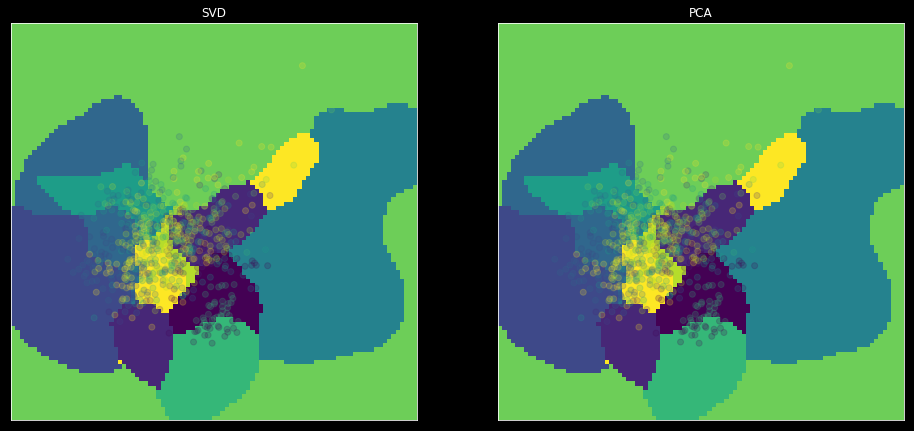

In [18]:
fig, (ax0, ax1) = subplots(1, 2, figsize=(16, 8))

Z_scv_pca, x_pca_min, x_pca_max, y_pca_min, y_pca_max = make_area(svc_pca, X_d2_pca)
Z_scv_svd, x_pca_min, x_pca_max, y_pca_min, y_pca_max = make_area(svc_svd, X_d2_svd)

ax0.imshow(Z_scv_svd, cmap=cm.viridis, interpolation="nearest", origin="lower",
          extent=(x_pca_min, x_pca_max, y_pca_min, y_pca_max))
ax0.set_xticks([]), ax0.set_yticks([])
ax0.scatter(X_d2_svd[ind_svd, 0], X_d2_svd[ind_svd, 1], c=d2.target[ind_svd], alpha=0.2)
ax0.set_title("SVD", color="w")

ax1.imshow(Z_scv_pca, cmap=cm.viridis, interpolation="nearest", origin="lower",
          extent=(x_svd_min, x_svd_max, y_svd_min, y_svd_max))
ax1.set_xticks([]), ax1.set_yticks([])
ax1.scatter(X_d2_pca[ind_pca, 0], X_d2_pca[ind_pca, 1], c=d2.target[ind_pca], alpha=0.2)
ax1.set_title("PCA", color="w")

savefig("../images/svd_pca_3_svm.png", dpi="figure", transparent=True)

In [19]:
A_svd, B_svd = km_svd.cluster_centers_[6], km_svd.cluster_centers_[8]

for i in (A_svd, B_svd):
    print(f"{i} - {km_svd.predict([i])}")

[2.10105147 1.64838367] - [6]
[ 1.20271246 -3.95577691] - [8]


In [20]:
A_pca, B_pca = km_pca.cluster_centers_[6], km_pca.cluster_centers_[8]

for i in (A_pca, B_pca):
    print(f"{i} - {km_pca.predict([i])}")

[ 4.95071883 -0.6897127 ] - [6]
[0.06388864 3.60283868] - [8]


In [21]:
def dist_eucl(a, b):
    return np.sqrt(np.sum((a-b)**2))

In [22]:
dist_eucl(A_svd, B_svd), dist_eucl(A_pca, B_pca)

(5.675705130238638, 6.504391337272736)

In [23]:
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)